In [2]:
import pandas as pd
import xgboost as xgb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [3]:
df_usa = pd.read_csv('Yan_reply_First_last_wtime.csv')
df_dutch = pd.read_excel('dutch.xlsx')
df_france = pd.read_excel('french.xlsx')
df_china = pd.read_excel('time_series_375_prerpocess_en.xlsx', index_col=[0,1])
df_china = df_china.groupby('PATIENT_ID').last()

df_new = pd.read_csv('dataset.csv')
dictio = {True:1, False:0}
df_new['outcome'] = df_new['Degree_Severe'].map(dictio)

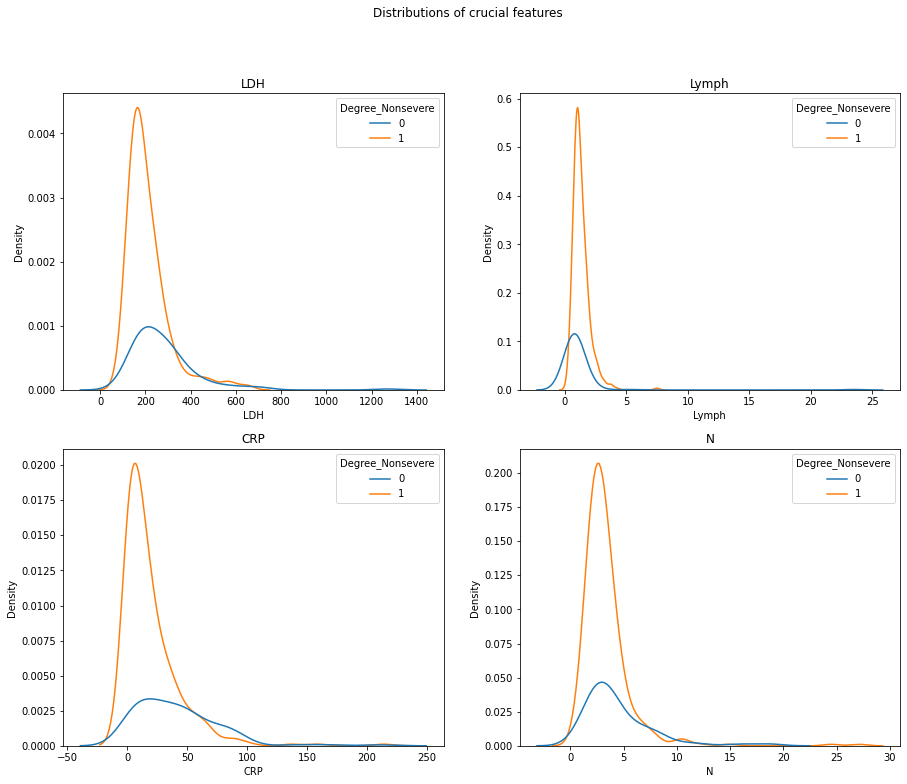

In [4]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

sns.kdeplot(data = df_new, x="Laboratory_test_LDH_(U/L)", hue="Degree_Nonsevere", ax = ax1)
ax1.set_title("LDH")
ax1.set_xlabel('LDH')
#ax1.set_xlim([0, 1300])

sns.kdeplot(data = df_new, x="Laboratory_test_L", hue="Degree_Nonsevere", ax = ax2)
ax2.set_title("Lymph")
ax2.set_xlabel('Lymph')
#ax2.set_xlim([0, 1300])

sns.kdeplot(data = df_new, x="Laboratory_test_CRP_(mg/L)", hue="Degree_Nonsevere", ax = ax3)
ax3.set_title("CRP")
ax3.set_xlabel('CRP')
#ax3.set_xlim([0, 1300])

sns.kdeplot(data = df_new, x="Laboratory_test_N", hue="Degree_Nonsevere", ax = ax4)
ax4.set_title("N")
ax4.set_xlabel('N')
#ax4.set_xlim([0, 1300])

plt.suptitle('Distributions of crucial features')
plt.show()

In [5]:
# https://apteline.pl/artykuly/co-to-jest-morfologia-krwi-obwodowej-jak-odczytac-wyniki-morfologii-krwi
# ta strona mówi, że tak się to mniej więcej skaluje, zeby było w % jak w innych zbiorach, ale nie wiem czy można ufać

df_new['lymph'] = df_new['Laboratory_test_L'] * 10

In [6]:
def draw_plot(df1, main_feature1, div_feature1, title1,
              df2, main_feature2, div_feature2, title2,
              df3, main_feature3, div_feature3, title3,
              feature_name, title, lim):
    
    fig, ax = plt.subplots(2, 3, figsize=(18, 4))
    fig.suptitle(title)

    sns.stripplot(x=main_feature1, y=df1[div_feature1].astype(str),
                  data=df1, dodge=True, alpha=.4, zorder=1, palette=["g", "m"], ax=ax[0][0], order=["0", "1"])
    ax[0][0].set_title(title1)
    ax[0][0].set(xlim=(0, lim))
    ax[0][0].set(xlabel="")
    ax[0][0].set(ylabel="Survival/death")
    ax[0][0].set_yticklabels(["Alive", "Deceased"])

    sns.stripplot(x=main_feature2, y=df2[div_feature2].astype(str),
                  data=df2, dodge=True, alpha=.4, zorder=1, palette=["g", "m"], ax=ax[0][1], order=["0", "1"])
    ax[0][1].set_title(title2)
    ax[0][1].set(xlim=(0, lim))
    ax[0][1].set(ylabel="")
    ax[0][1].set_yticklabels(["Alive", "Deceased"])
    ax[0][1].set(xlabel="")

    sns.stripplot(x=main_feature3, y=df3[div_feature3].astype(str),
                  data=df3, dodge=True, alpha=.4, zorder=1, palette=["g", "m"], ax=ax[0][2], order=["0", "1"])
    ax[0][2].set_title(title3)
    ax[0][2].set(xlim=(0, lim))
    ax[0][2].set(ylabel="")
    ax[0][2].set_yticklabels(["Alive", "Deceased"])
    ax[0][2].set(xlabel="")

    sns.boxplot(y=df1[div_feature1].astype(str), x=main_feature1, data=df1, ax=ax[1][0], palette=["g", "m"], linewidth=1, fliersize=3, order=["0", "1"])
    ax[1][0].set(xlim=(0, lim))
    ax[1][0].set(xlabel=feature_name)
    ax[1][0].set(ylabel="Survival/death")
    ax[1][0].set_yticklabels(["Alive", "Deceased"])

    sns.boxplot(y=df2[div_feature2].astype(str), x=main_feature2, data=df2, ax=ax[1][1], palette=["g", "m"],linewidth=1, fliersize=3, order=["0", "1"])
    ax[1][1].set(xlim=(0, lim))
    ax[1][1].set(xlabel=feature_name)
    ax[1][1].set(ylabel="")
    ax[1][1].set_yticklabels(["Alive", "Deceased"])

    sns.boxplot(y=df3[div_feature3].astype(str), x=main_feature3, data=df3, ax=ax[1][2], palette=["g", "m"],linewidth=1, fliersize=3, order=["0", "1"])
    ax[1][2].set(xlim=(0, lim))
    ax[1][2].set(xlabel=feature_name)
    ax[1][2].set(ylabel="")
    ax[1][2].set_yticklabels(["Alive", "Deceased"])

    plt.subplots_adjust(wspace=0.35, hspace=0.35, top=0.85)

    sns.despine()
    #fig.savefig('ldh_usa.png', dpi=fig.dpi)
    plt.show()

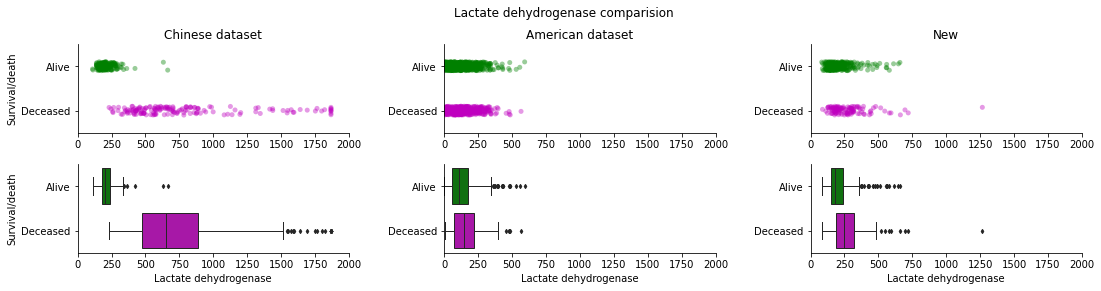

In [7]:
draw_plot(df_china, 'Lactate dehydrogenase', 'outcome', 'Chinese dataset',
          df_usa, 'First_CRP', 'Expired_Outcome', 'American dataset',
          df_new, 'Laboratory_test_LDH_(U/L)', 'outcome', 'New',
          'Lactate dehydrogenase', 'Lactate dehydrogenase comparision', 2000)

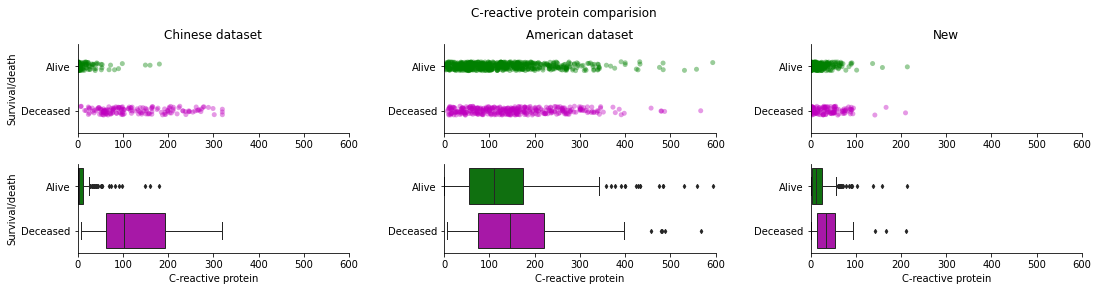

In [8]:
draw_plot(df_china, 'High sensitivity C-reactive protein', 'outcome', 'Chinese dataset',
          df_usa, 'First_CRP', 'Expired_Outcome', 'American dataset',
          df_new, 'Laboratory_test_CRP_(mg/L)', 'outcome', 'New',
          'C-reactive protein', 'C-reactive protein comparision', 600)

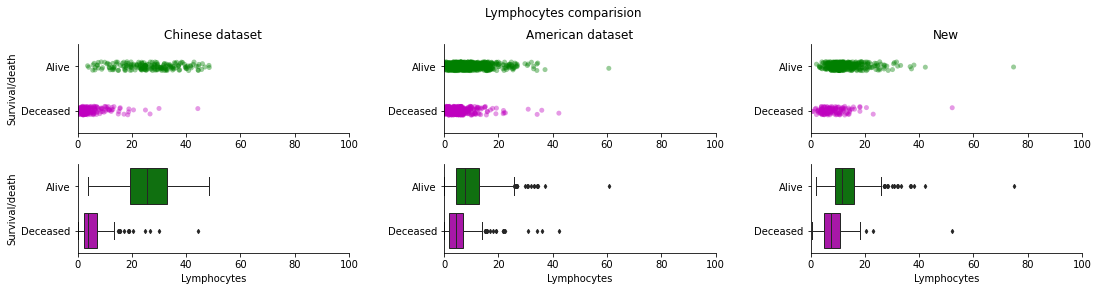

In [9]:
draw_plot(df_china, '(%)lymphocyte', 'outcome', 'Chinese dataset',
          df_usa, 'First_Lymph', 'Expired_Outcome', 'American dataset',
          df_new, 'lymph', 'outcome', 'New',
          'Lymphocytes', 'Lymphocytes comparision', 100)

[Text(0, 0, 'Alive'), Text(0, 1, 'Deceased')]

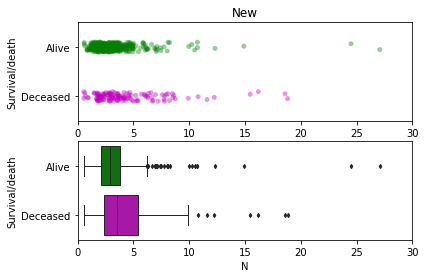

In [10]:
fig, ax = plt.subplots(2, figsize=(6, 4))

sns.stripplot(x='Laboratory_test_N', y=df_new['outcome'].astype(str),
                  data=df_new, dodge=True, alpha=.4, zorder=1, palette=["g", "m"], ax=ax[0], order=["0", "1"])
ax[0].set_title('New')
ax[0].set(xlim=(0, 30))
ax[0].set(xlabel="")
ax[0].set(ylabel="Survival/death")
ax[0].set_yticklabels(["Alive", "Deceased"])
    
sns.boxplot(y=df_new['outcome'].astype(str), x='Laboratory_test_N', data=df_new, ax=ax[1], palette=["g", "m"], linewidth=1, fliersize=3, order=["0", "1"])
ax[1].set(xlim=(0, 30))
ax[1].set(xlabel='N')
ax[1].set(ylabel="Survival/death")
ax[1].set_yticklabels(["Alive", "Deceased"])